# KEGGutils Tutorial 2 : `KEGGgraph`s, `KEGGlinkgraph`s and `KEGGchain`s
## .... redoing Tutorial 1 with different tools
***

<img src="../img/logo_cut.png" alt="Drawing" style="width: 350px;"/>

### First things first
Let's make sure we imported `KEGGutils` ( and that we can find it in scope if we did not install it )

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
import KEGGutils as kg
import networkx as nx

and that that we have the last available version

In [3]:
kg.__version__

'0.2.0'

let's remove the cached files to use the freshest available data

In [4]:
kg.delete_cached_files()

> deleting the following files from C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads
C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads\disease-info
C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads\ds-H00773-description
C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads\enzyme-hsa-link
C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads\enzyme-info
C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads\hsa-disease-link
C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads\hsa-info
C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads\reaction-enzyme-link
C:\Users\filippo.castelli4\Documents\GitHub\KEGGutils\tutorials\kegg_downloads\reaction-info


### Introducing `KEGGgraph`, `KEGGlinkgraph` and `KEGGchain`:

In the previous tutorial we've seen how we can use `KEGGutil`'s function set to create and manage vanilla `networkx` graphs with KEGG data, in this tutorial we're gonna use some special graph-like classes designed specifically for KEGG data: `KEGGgraph`, `KEGGlinkgraph` and `KEGGchain`.

`KEGGlinkgraph` and `KEGGchain` (as `KEGGpathway` which we'll se in the next tutorial ) are children of `KEGGgraph` which inherits from `netowrkx.Graph`: that means that you'll be able to use any `networkx` method on these objects and are not limited to `KEGGutils`'s tools.

In [5]:
print(kg.KEGGgraph.__doc__)

Base class from KEGGutils NetworkX compatible Graphs:
    Directly inherits from networkx.Graph()

    Methods
    -------
    list_by_nodetype(nodetype)
        returns a dict of nodes for the given nodetype in the form {key: nodetype}
    
    connected_components()
        returns a list of connected components
    
    linked_nodes(node)
        returns a dict of nodes in the graph connected to a givne node in the form {key: nodetype}

     graph_measures()
        returns a list of graph characteristics
    
    shortest_path(source_node, target_node):
        computes the shortest path between two nodes
    
    compose(othergraph, inplace = False)
        returns graph composition between self and one or more other graphs
    
    neighbor_graph(nodedict, keep_isolated_nodes, inplace = False)
        returns graph of internal neighbors to a given dict of nodes

    get_unique_nodetypes()
        returns unique nodetypes in graph

    draw(layout = None)
        plots the graph
 

In this quick summary we can see the main methods that are common to all `KEGGgraph`s: we can see some of the tools that we used before like `neighbor_graph` 

In [6]:
print(kg.KEGGgraph.neighbor_graph.__doc__)

Neighbor Graph
        
        Parameters
        ----------
        nodelist : list
            contains the nodes we wish to calculate the neighbor graph respect to
        keep_isolated_nodes : bool, optional
            Isolated nodes can be automatically removed selecting False (the default is True)
        inplace : bool, optional
            Substitutes the original graph with the neighbor graph (the default is False, which [default_description])
        
        Returns
        -------
        graph
            neighbor graph
        


and some tools we have not used yet like `compose` 

In [7]:
print(kg.KEGGgraph.compose.__doc__)

Compose
        Calculates composition between two or mre graphs
        
        Parameters
        ----------
        othergraph : KEGGgraph
            Can be a single KEGGgraph, a list of graphs or a tuple of graphs, contains the other graphs you want to calculate composition respect to
        inplace : bool, optional
            If True the original graph calling the method is substituted by the composition (the default is False)
        
        Returns
        -------
        KEGGgraph
            composed graph
        


if these seem to few that's because there are other methods hidden in the depths of `KEGGgraph` children classes, like the `KEGGlinkgraph` method `projected_graph`, that we used before 

In [8]:
print(kg.KEGGlinkgraph.projected_graph.__doc__)

Projects the link graph on a subset of nodes
        
        Parameters
        ----------
        nodelist : list, optional
            list of nodes you wish to project onto, if None automatically selects source nodes
        name : str, optional
            name of the graph
        
        
        Returns
        -------
        graph
            projection graph
        


and many other methods are scheduled for future developement.

### Using `KEGGlinkgraph`:

Let's start our tutorial with a class that makes life easier whe dealing with KEGG LINK data: `KEGGlinkgraph`

`KEGGlinkgraph`s are specifically meant to create biparite graphs between couples of KEGG databases automating the process of data retrieval and graph population

In [9]:
print(kg.KEGGlinkgraph.__doc__)

KEGGlinkgraph class inherits from KEGGgraph
    Can be used to build bipartite graphs from KEGG API LINK functionality 
    
    Parameters
    ----------
    source_db : str
        Source Database
    target_db : str
        Target Database

    Properties
    ----------
    source_nodes : dict
        dict of source nodes {node: nodetype}
    target_nodes : dict
        dict of target nodes {node: nodetype}
    source_liked_db : list
        list of databases connected to source in KEGG
    target_linked_db : list
        list of databases connected to target in KEGG
    


creating a bipartite graph between two databases is easy and only involves calling the constructor with the parameters `source_db` and `target_db`

In [10]:
dis_gene = kg.KEGGlinkgraph(source_db = "disease", target_db = "hsa")
gene_enzyme = kg.KEGGlinkgraph(source_db = "hsa", target_db ="enzyme")
enzyme_reaction = kg.KEGGlinkgraph(source_db = "enzyme", target_db = "reaction")

INFO:root:> Downloading hsa-disease-link from KEGG at http://rest.kegg.jp/link/hsa/disease
INFO:root:succesfully downloaded hsa-disease-link
INFO:root:> Downloading enzyme-hsa-link from KEGG at http://rest.kegg.jp/link/enzyme/hsa
INFO:root:succesfully downloaded enzyme-hsa-link
INFO:root:> Downloading reaction-enzyme-link from KEGG at http://rest.kegg.jp/link/reaction/enzyme
INFO:root:succesfully downloaded reaction-enzyme-link


In [11]:
print("The KEGGlinkgraph {} is a bipartite graph that links {} database to {} database ".format(dis_gene.name,
                                                                                                dis_gene.source_db,
                                                                                                dis_gene.target_db))

The KEGGlinkgraph disease_to_hsa is a bipartite graph that links disease database to hsa database 


we can also have infos on source and target databases with a simple command:

In [12]:
dis_gene.target_infos()

INFO:root:Infos on hsa from KEGG:



T01001           Homo sapiens (human) KEGG Genes Database
hsa              Release 90.0+/03-30, Mar 19
                 Kanehisa Laboratories
                 38,683 entries

linked db        pathway
                 brite
                 module
                 ko
                 genome
                 enzyme
                 network
                 disease
                 drug
                 ncbi-geneid
                 ncbi-proteinid
                 uniprot



and easily check which other databases are linked to the current ones in KEGG

In [13]:
dis_gene.target_linked_db

['pathway',
 'brite',
 'module',
 'ko',
 'genome',
 'enzyme',
 'network',
 'disease',
 'drug',
 'ncbi-geneid',
 'ncbi-proteinid',
 'uniprot']

As before we wish to investigate a particular disease:

In [14]:
dis_gene.nodes['ds:H00773']

{'nodetype': 'disease', 'label': 'ds:H00773'}

In [15]:
kg.keggapi_get("ds:H00773")

Infos on ds:H00773 from KEGG:

NAME        Autosomal dominant mental retardation
DESCRIPTION Mental retardation (MR) is a neurodevelopmental disorder characterized by low intelligence quotient (IQ) and deficits in adaptive behaviors. Most MR genes identified so far were either located on the X chromosome or are associated with an autosomal recessive mode of inheritance. Recently, a lot of genes associated with autosomal dominant mental retardation have been identified.
CATEGORY    Mental and behavioural disorder


we may want now to see which nodes are liked to the chosen disease, that can be done using the `linked_nodes` method

In [16]:
ds_genes = dis_gene.linked_nodes("ds:H00773")
ds_genes[:10]

['hsa:55777',
 'hsa:81704',
 'hsa:1013',
 'hsa:84623',
 'hsa:8831',
 'hsa:2904',
 'hsa:1859',
 'hsa:2902',
 'hsa:547',
 'hsa:10369']

we can have the same information in a dict-like format using the `return_dict` option

In [17]:
list(dis_gene.linked_nodes("ds:H00773", return_dict = True).items())[:10]

[('hsa:55777', 'hsa'),
 ('hsa:81704', 'hsa'),
 ('hsa:1013', 'hsa'),
 ('hsa:84623', 'hsa'),
 ('hsa:8831', 'hsa'),
 ('hsa:2904', 'hsa'),
 ('hsa:1859', 'hsa'),
 ('hsa:2902', 'hsa'),
 ('hsa:547', 'hsa'),
 ('hsa:10369', 'hsa')]

Let's narrow down our search in the `gene_enzyme` graph using the nodes  we just found and plot what we have

C:\Users\filippo.castelli4\AppData\Local\Continuum\anaconda3\envs\KEGGenv\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


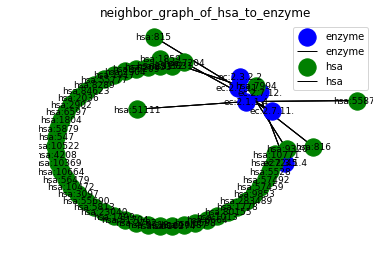

In [18]:
ds_gene_enzyme = gene_enzyme.neighbor_graph(ds_genes)
ds_gene_enzyme.draw(layout = "kamada_kawai_layout")

if this plot is too confusing we can always choose to ignore the unconnected nodes using the `prune_isolated_nodes` method.

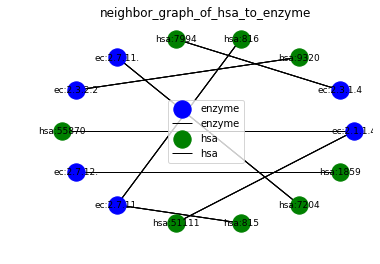

In [19]:
ds_gene_enzyme.prune_isolated_nodes().draw(layout = "circular_layout")

note that all the `KEGGgraph` main methods are chainable, and that they won't have a permanent effect on the original graph unless the `inplace` option is set to True

Let's dig down in our search selecting only the enzymes we're interested in the  `enzyme_reaction` graph

In [20]:
ds_enzymes = ds_gene_enzyme.list_by_nodetype("enzyme")
ds_enzyme_reaction = enzyme_reaction.neighbor_graph(ds_enzymes)

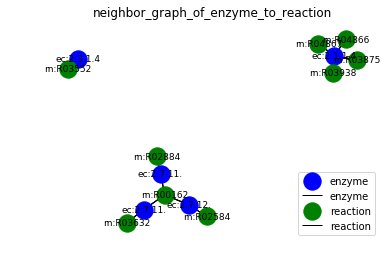

In [21]:
ds_enzyme_reaction.prune_isolated_nodes().draw()

and finally we can project this last graph onto it's `enzyme` components, note that if we're trying a projection on a `KEGGlikgraph` without specifying a set of nodes to project onto, `KEGGutils` will assume you're projecting onto the `graph.source_nodes`

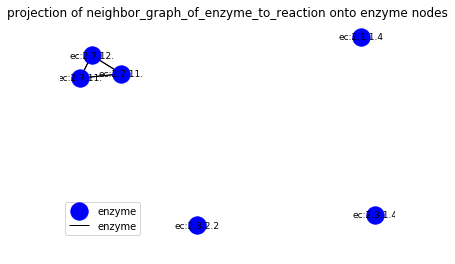

In [22]:
ds_enzyme_reaction.projected_graph().draw()

after all, `KEGGlinkgraph` class makes the operation a bit less clunky than in Tutorial 1 but wouldn't it be better if this could be achieved with one or two lines of code?

### Introducing `KEGGchain`s:

To deal with multiple interlinked databases and to facilitate data discovery, `KEGGutils` provides the `KEGGchain` class: if we have a series of sequentially linked databases we can chain them with a `KEGGchain`

In [23]:
print(kg.KEGGchain.__doc__)

 KEGGchain
    Can be used to build chains of KEGGlinkgraphs, builds a composed graph of sequentially linked databases

    --------------
    chain : list
        list of databases, they have to be sequentially linked in KEGG

    Properties
    ----------

    chain_dbs : list
        list of databases
    chain : list
        list of chained KEGGlinkgraphs
    directed_chain : diGraph
        directed version of the chain
        
    


In [24]:
mychain = kg.KEGGchain(chain = ["disease", "hsa", "enzyme", "reaction"])

INFO:root:Infos on disease from KEGG:

reading from chached file...
INFO:root:Infos on hsa from KEGG:

reading from chached file...
INFO:root:Infos on enzyme from KEGG:

reading from chached file...


`KEGGchain`s are basically `KEGGgraph`s on steroids: while they're intrinsically an undirected `KEGGgraph` that combines multiple `KEGGlinkgraphs`, they have, as properties, a directed version of themselves and a list of the `KEGGlinkgraph`s that originated them in the first place

In [25]:
print("chains belong to {}".format(type(mychain)))
print("They have a .chain property that is a {} of {}s".format(type(mychain.chain).__name__,
                                                               type(mychain.chain[0]).__name__))
print("and a .directed_chain that is a {}".format(type(mychain.directed_chain).__name__))

chains belong to <class 'KEGGutils.KEGGgraphs.KEGGchain'>
They have a .chain property that is a list of KEGGlinkgraphs
and a .directed_chain that is a DiGraph


this may seem a bit confusing at first but here's an explanatory [pic](https://i.imgflip.com/2xbwd2.jpg)

They have a list of the `KEGGlinkgraph`s they combine

In [26]:
mychain.chain 

In [27]:
print("The first chain element links {} to {},".format(mychain.chain[0].source_db, mychain.chain[0].target_db))
print("second chain element links {} to {},".format(mychain.chain[1].source_db, mychain.chain[1].target_db))
print("and third chain element links {} to {}".format(mychain.chain[2].source_db, mychain.chain[2].target_db))

The first chain element links disease to hsa,
second chain element links hsa to enzyme,
and third chain element links enzyme to reaction


and a directed version of the graph combination

In [28]:
mychain.directed_chain.is_directed()

True

The two interesting methods `KEGGchain` provides are `directed_propagation()` and `projected_graph()`

with `directed_propagation` we can choose to select from the chain only the nodes that are directly descending from a particular set of nodes up in the chain: 

In [29]:
print(mychain.directed_propagation.__doc__)

Directed propagation
        Computes the subchain of nodes that are sequentially linked to nodelist
        
        Parameters
        ----------
        nodelist : list
            list of nodes you wish to propagate from
        chain_level : int, optional
            If the nodes are not in the first level of the chain you need to specify which level they're in
        inplace : bool, optional
            if True propagates the changes to the original KEGGchain (the default is False])
        return_directed : bool, optional
            if True returns the directed chain instead of the original chain (the default is False)
        


with `directed_propagation` we can choose to select from the chain only the nodes that are

In [30]:
prop_chain = mychain.directed_propagation(["ds:H00773"])

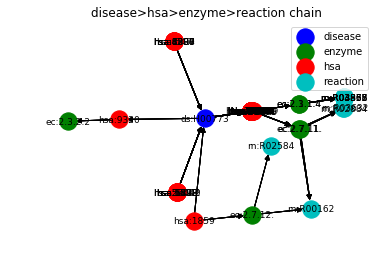

In [31]:
prop_chain.draw(layout = "kamada_kawai_layout")

and with `projected_graph()` we can perform the same graph projection we did before in one easy step:

In [35]:
print(prop_chain.projected_graph.__doc__)

Projected Graph
        Calculates the projection of a given chain level onto the next 
        
        Parameters
        ----------
        chain_level : str
            name of the interested chain level, if None projection of the second to last level is made onto the last (default is None)

        Returns
        -------
        KEGGgraph
            projected graph
        


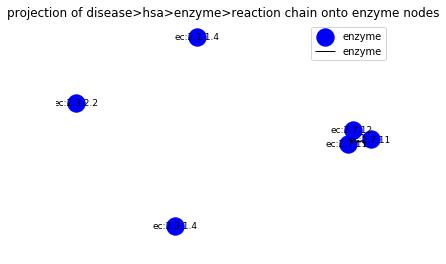

In [32]:
prop_chain.projected_graph().draw()

Considering that all the methods used before **are chainable** we can also perform the same exact set of operation in one single line:

INFO:root:Infos on disease from KEGG:

reading from chached file...
INFO:root:Infos on hsa from KEGG:

reading from chached file...
INFO:root:Infos on enzyme from KEGG:

reading from chached file...
C:\Users\filippo.castelli4\AppData\Local\Continuum\anaconda3\envs\KEGGenv\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


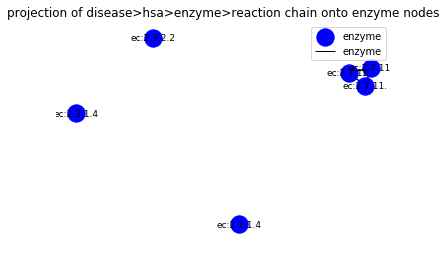

In [36]:
kg.KEGGchain(chain = ["disease", "hsa", "enzyme", "reaction"]).directed_propagation(["ds:H00773"]).projected_graph().draw()

That concludes this tutorial on `KEGGgraph` and some of it's derived classes, in the next we're gonna see another derived class that's specifically meant for pathways.